In [80]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

from pca_functions import *

In [81]:
parent_dir = '/Users/allybaldelli/Desktop/exo-comets/ProjectExoComet/'
df = pd.read_pickle(parent_dir+'data_file/'+'master_df_final.pkl')  

In [82]:
# Drop the columns
try:
    df = df.drop(columns=['MJD-Obs', 'Date-Obs'])

except KeyError as e:
    print(f"columns already dropped")

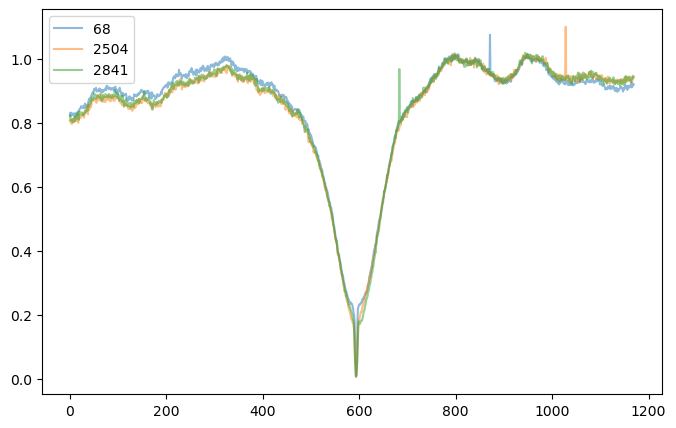

In [96]:
n_componets = 6
pca, principal_components, scaler, scaled_data = pca_funct(df, n_componets)
estimated_df = pca_estimate(pca, principal_components)
index_list = vaiations(scaled_data, estimated_df, df, 20)


df_reset = df.reset_index(drop=True)
plt.figure(figsize=(8, 5))
for index in index_list:
        plt.plot(df_reset.loc[index], label = index, alpha=0.5)

plt.legend()

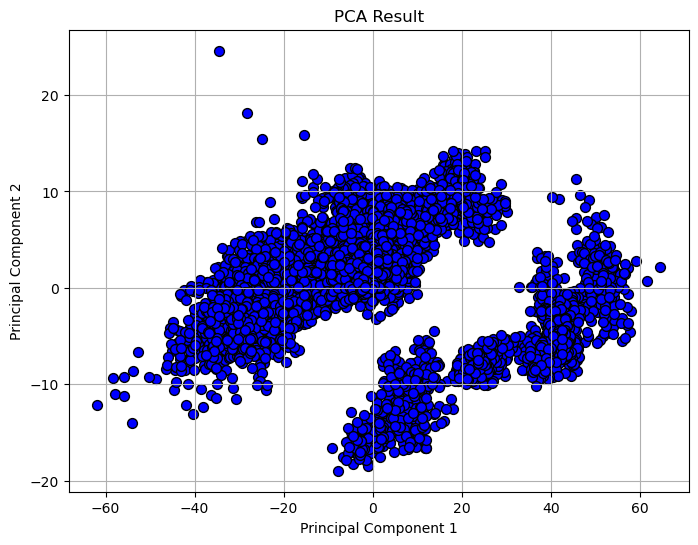

In [97]:
pca_df = pd.DataFrame(data=principal_components, columns=["PC"+str(i) for i in range(1, n_componets+1)])

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.grid()
plt.show()

In [85]:
from sklearn.cluster import HDBSCAN

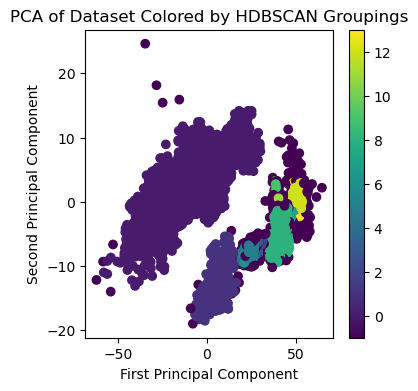

In [98]:

hdb = HDBSCAN(allow_single_cluster=False) #what happens if left True??
hdb.fit(principal_components[:, :2])
labels = hdb.labels_

plt.figure(figsize=(4,4))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset Colored by HDBSCAN Groupings')
plt.show()

In [87]:
from sklearn.cluster import KMeans

/Users/allybaldelli/opt/anaconda3/envs/exo-coment-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


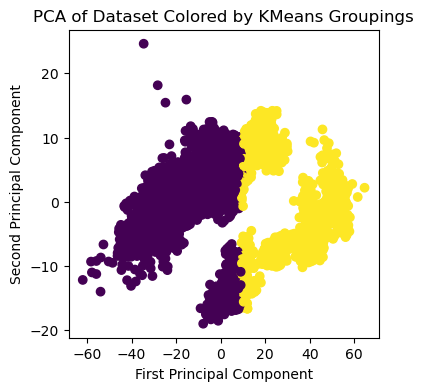

In [99]:

# Assuming principal_components is already defined
n_clusters = 2  # You can set the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=43).fit(principal_components[:, :2])

labels = kmeans.labels_

plt.figure(figsize=(4, 4))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset Colored by KMeans Groupings')
plt.show()

In [89]:
from sklearn.cluster import DBSCAN


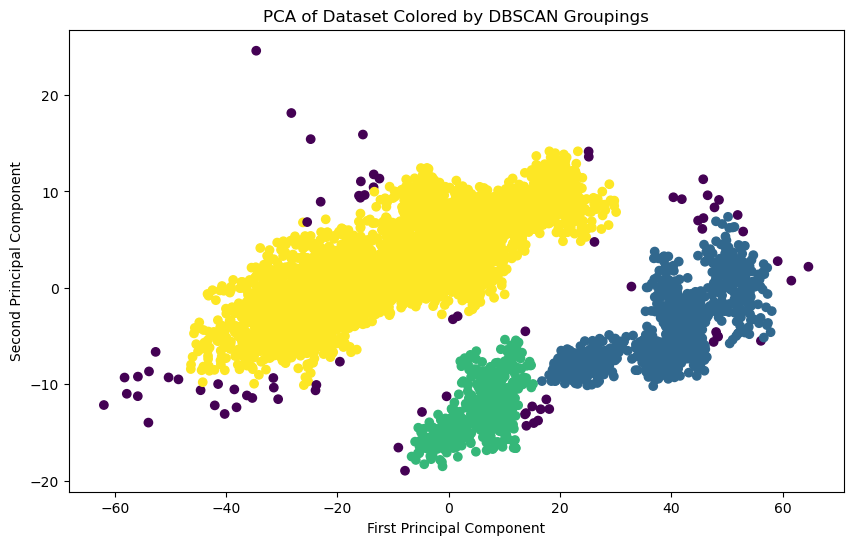

In [106]:
# Assuming principal_components is already defined
n_clusters = 6  # You can set the desired number of clusters
dbscan = DBSCAN(eps= 1.5).fit(principal_components[:, :2 ])

dbscan_labels = dbscan.labels_

plt.figure(figsize=(10, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=dbscan_labels, cmap='viridis')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset Colored by DBSCAN Groupings')
plt.show()

6676it [00:15, 424.12it/s] 


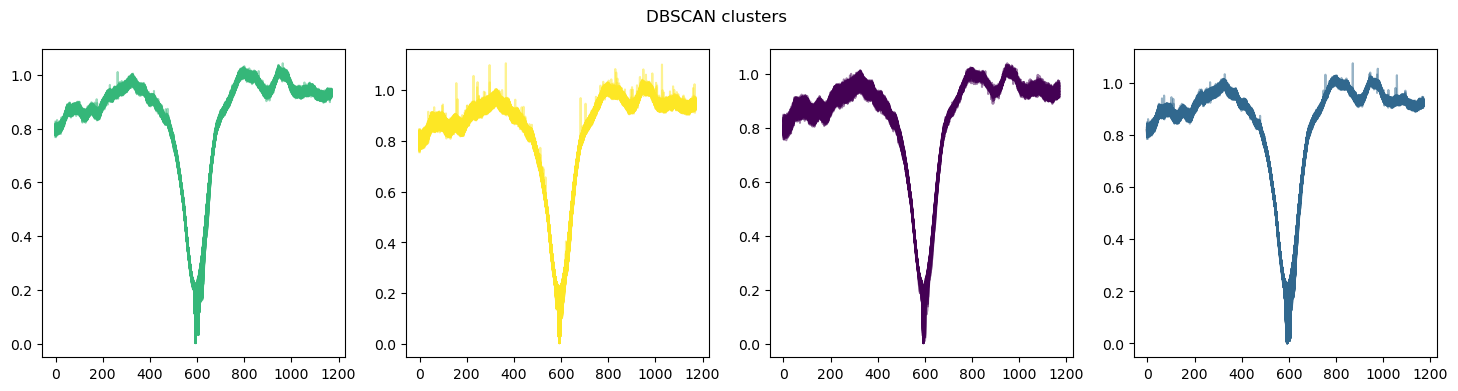

In [120]:
n_clusters = max(dbscan_labels) + 1

# Create a figure with three subplots
fig, axes = plt.subplots(1, n_clusters + 1, figsize=(18, 4))

# axes is a list of three Axes objects
axes_list = [axes[i] for i in range(n_clusters + 1)]


colors = ["#ca5670", "#72a555", "#ab62c0", "#c57c3c", "#638ccc"]

for index, row in tqdm(df_reset.iterrows()):
        label = dbscan_labels[index] 
        color =plt.cm.viridis((label + 1)/ n_clusters)
        axes_list[label - 1].plot(row, alpha=0.5, color = color)

fig.suptitle('DBSCAN clusters')
plt.savefig(parent_dir+'PCA_stuff/'+'DBSCAN_plot_clusters.png')

6676it [00:06, 970.10it/s] 


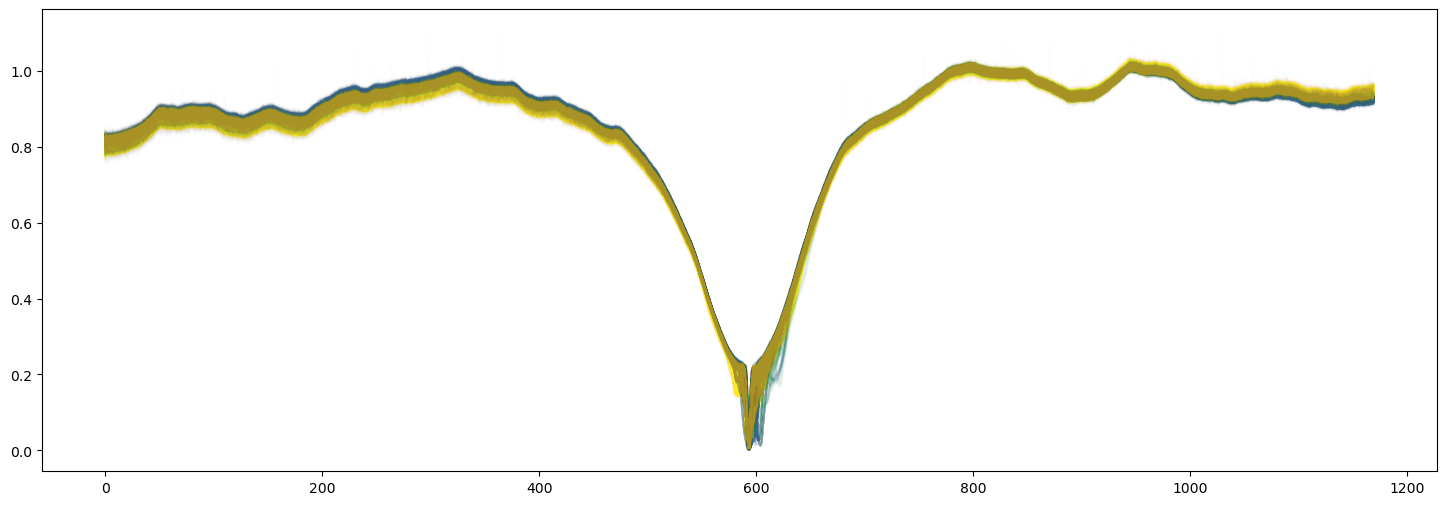

In [108]:
# Create a figure with all the spectra stacked but colorsed
fig, ax = plt.subplots(figsize=(18, 6))

for index, row in tqdm(df_reset.iterrows()):
    label = dbscan_labels[index] 
    color =plt.cm.viridis((label + 1)/ n_clusters)
    ax.plot(row, alpha=0.01, color = color)

100%|██████████| 3/3 [00:00<00:00, 23.54it/s]


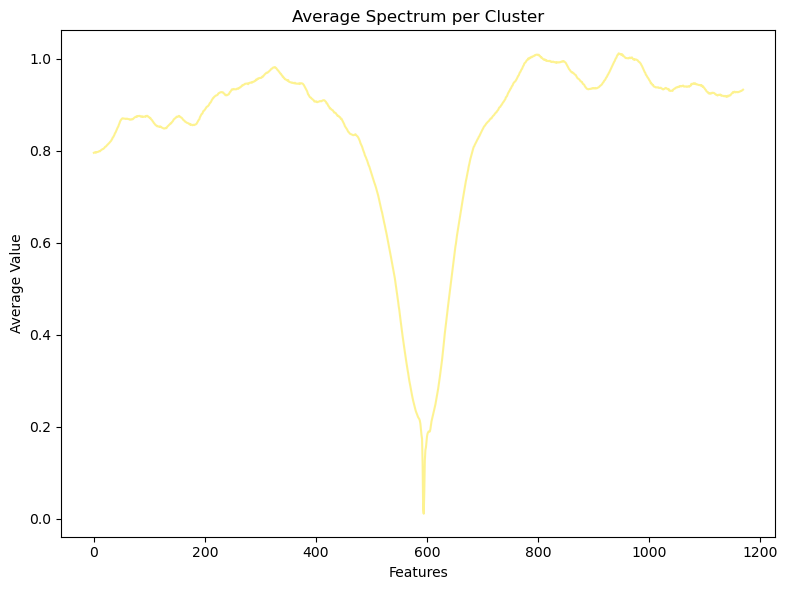

<Figure size 640x480 with 0 Axes>

In [122]:
# Create a figure with subplots for each label
fig, ax = plt.subplots( figsize=(8, 6))
n_clusters = max(dbscan_labels) + 1
# Calculate and plot the average of each row per label
for label in tqdm(range(n_clusters)):
    # Select rows corresponding to the current label
    label_rows = df_reset[dbscan_labels == label - 1]
    
    # Calculate the average of each row
    average_row = label_rows.mean(axis=0)
    
    color =plt.cm.viridis((label + 1)/ n_clusters)

    # Plot the average row
ax.plot(average_row, color=color, alpha=0.5)
ax.set_title('Average Spectrum per Cluster')
ax.set_xlabel('Features')
ax.set_ylabel('Average Value')

#plt.xlim(500, 700)
#plt.ylim(0, 0.3)
plt.tight_layout()
plt.show()
plt.savefig(parent_dir+'PCA_stuff/'+'average_spec_cluster.png')

In [116]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,49.630298,1.465438,-3.395766,-7.944636,2.178148,0.000899
1,52.288435,0.529017,-3.564283,-7.423465,1.826831,-0.563482
2,53.369857,1.390512,-1.777806,-3.135431,3.354483,3.337630
3,52.827408,1.651099,-1.543971,-3.148070,3.242271,3.078167
4,49.329151,-0.093875,-2.494017,-4.648109,2.516528,5.020651


In [117]:
pca_df.to_pickle(parent_dir+'/PCA_stuff/'+'PCA.pkl')  

In [94]:
# Assuming principal_components is already defined
n_clusters = 6  # You can set the desired number of clusters
dbscan_test = DBSCAN(eps= 0.5).fit(principal_components[:,1: ])

dbscan_labels_test = dbscan_test.labels_

plt.figure(figsize=(10, 6))
scatter = plt.scatter(principal_components[:, 1], principal_components[:, 2], c=dbscan_labels_test, cmap='viridis')

plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')
plt.title('PCA of Dataset Colored by DBSCAN Groupings (without first conponent)')
plt.show()

# Create a figure with three subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

# axes is a list of three Axes objects
axes_list = [axes[0], axes[1], axes[2], axes[3]]

n_clusters = max(dbscan_labels_test) + 1
colors = ["#ca5670", "#72a555", "#ab62c0", "#c57c3c", "#638ccc"]

for index, row in tqdm(df_reset.iterrows()):
        label = dbscan_labels_test[index]
        color =plt.cm.viridis((label + 1)/ n_clusters)
        axes_list[label].plot(row, alpha=0.5, color = color)

plt.title('DBSCAN clusters')

IndexError: index 2 is out of bounds for axis 1 with size 2

<Figure size 1000x600 with 0 Axes>